In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [364]:
os.chdir("C:\\Users\\Nilesh\\Documents\\GitHub\\Practical\\")
df = pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [365]:
df.shape

(10, 4)

In [366]:
print(len(df)) 

10


In [367]:
df.columns
df.index

RangeIndex(start=0, stop=10, step=1)

In [368]:
categorical = []
continuous = []
for column in df.columns:
    if df[column].dtypes == "int64" or df[column].dtypes == "float64":
        continuous.append(column)
    if df[column].dtypes == "object":
        categorical.append(column)

In [369]:
categorical

['Country', 'Purchased']

In [370]:
continuous

['Age', 'Salary']

In [371]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [372]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [373]:
df['Age'] = df['Age'].fillna(38.777778)

In [374]:
df.isnull().sum()

Country      0
Age          0
Salary       1
Purchased    0
dtype: int64

In [375]:
df['Salary'] = df['Salary'].fillna(63777.777778
                                  )

In [376]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [377]:
le = LabelEncoder()
df['Purchased'] = le.fit_transform(df['Purchased'])

In [378]:
ohe_df = pd.get_dummies(df['Country'])
ohe_df.drop(['Germany'], axis=1, inplace=True)

In [379]:
df = pd.concat([df, ohe_df], axis=1)

In [380]:
df

,Country,Age,Salary,Purchased,France,Spain
0,France,44.000000,72000.000000,0,1,0
1,Spain,27.000000,48000.000000,1,0,1
2,Germany,30.000000,54000.000000,0,0,0
3,Spain,38.000000,61000.000000,0,0,1
4,Germany,40.000000,63777.777778,1,0,0
5,France,35.000000,58000.000000,1,1,0
6,Spain,38.777778,52000.000000,0,0,1
7,France,48.000000,79000.000000,1,1,0
8,Germany,50.000000,83000.000000,0,0,0
9,France,37.000000,67000.000000,1,1,0


In [381]:
df.drop(['Country'], axis=1, inplace=True)

In [382]:
df

,Age,Salary,Purchased,France,Spain
0,44.000000,72000.000000,0,1,0
1,27.000000,48000.000000,1,0,1
2,30.000000,54000.000000,0,0,0
3,38.000000,61000.000000,0,0,1
4,40.000000,63777.777778,1,0,0
5,35.000000,58000.000000,1,1,0
6,38.777778,52000.000000,0,0,1
7,48.000000,79000.000000,1,1,0
8,50.000000,83000.000000,0,0,0
9,37.000000,67000.000000,1,1,0


In [383]:
df_X = df.iloc[:,[0,1,3,4]]
df_X

,Age,Salary,France,Spain
0,44.000000,72000.000000,1,0
1,27.000000,48000.000000,0,1
2,30.000000,54000.000000,0,0
3,38.000000,61000.000000,0,1
4,40.000000,63777.777778,0,0
5,35.000000,58000.000000,1,0
6,38.777778,52000.000000,0,1
7,48.000000,79000.000000,1,0
8,50.000000,83000.000000,0,0
9,37.000000,67000.000000,1,0


In [384]:
df_X.columns

Index(['Age', 'Salary', 'France', 'Spain'], dtype='object')

In [385]:
df_Y = df.iloc[:,2]

In [386]:
df_Y

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Purchased, dtype: int32

In [387]:
df_X

,Age,Salary,France,Spain
0,44.000000,72000.000000,1,0
1,27.000000,48000.000000,0,1
2,30.000000,54000.000000,0,0
3,38.000000,61000.000000,0,1
4,40.000000,63777.777778,0,0
5,35.000000,58000.000000,1,0
6,38.777778,52000.000000,0,1
7,48.000000,79000.000000,1,0
8,50.000000,83000.000000,0,0
9,37.000000,67000.000000,1,0


In [388]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [389]:
df_X_scaled

,Age,Salary,France,Spain
0,7.588744e-01,7.494733e-01,1.224745,-0.654654
1,-1.711504e+00,-1.438178e+00,-0.816497,1.527525
2,-1.275555e+00,-8.912655e-01,-0.816497,-0.654654
3,-1.130238e-01,-2.532004e-01,-0.816497,1.527525
4,1.776089e-01,1.823057e-11,-0.816497,-0.654654
5,-5.489729e-01,-5.266569e-01,1.224745,-0.654654
6,2.906327e-08,-1.073570e+00,-0.816497,1.527525
7,1.340140e+00,1.387538e+00,1.224745,-0.654654
8,1.630773e+00,1.752147e+00,-0.816497,-0.654654
9,-2.583402e-01,2.937125e-01,1.224745,-0.654654


In [390]:
X=df_X_scaled
Y=df_Y

In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True)

In [392]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[4 1]
 [3 2]]
Accuracy by confusion matrix: 0.6


                  precision    recall  f1-score   support

without diabetes       0.57      0.80      0.67         5
   with diabetes       0.67      0.40      0.50         5

        accuracy                           0.60        10
       macro avg       0.62      0.60      0.58        10
    weighted avg       0.62      0.60      0.58        10

----------------------------------------------------------------------


In [393]:
df_results = pd.concat([df_X_scaled, Y], axis=1)
df_results

,Age,Salary,France,Spain,Purchased
0,7.588744e-01,7.494733e-01,1.224745,-0.654654,0
1,-1.711504e+00,-1.438178e+00,-0.816497,1.527525,1
2,-1.275555e+00,-8.912655e-01,-0.816497,-0.654654,0
3,-1.130238e-01,-2.532004e-01,-0.816497,1.527525,0
4,1.776089e-01,1.823057e-11,-0.816497,-0.654654,1
5,-5.489729e-01,-5.266569e-01,1.224745,-0.654654,1
6,2.906327e-08,-1.073570e+00,-0.816497,1.527525,0
7,1.340140e+00,1.387538e+00,1.224745,-0.654654,1
8,1.630773e+00,1.752147e+00,-0.816497,-0.654654,0
9,-2.583402e-01,2.937125e-01,1.224745,-0.654654,1


In [394]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])
df_final = pd.concat([df_results, Y_pred], axis=1)
df_final

,Age,Salary,France,Spain,Purchased,Y_pred
0,7.588744e-01,7.494733e-01,1.224745,-0.654654,0,1
1,-1.711504e+00,-1.438178e+00,-0.816497,1.527525,1,0
2,-1.275555e+00,-8.912655e-01,-0.816497,-0.654654,0,0
3,-1.130238e-01,-2.532004e-01,-0.816497,1.527525,0,0
4,1.776089e-01,1.823057e-11,-0.816497,-0.654654,1,0
5,-5.489729e-01,-5.266569e-01,1.224745,-0.654654,1,1
6,2.906327e-08,-1.073570e+00,-0.816497,1.527525,0,0
7,1.340140e+00,1.387538e+00,1.224745,-0.654654,1,0
8,1.630773e+00,1.752147e+00,-0.816497,-0.654654,0,0
9,-2.583402e-01,2.937125e-01,1.224745,-0.654654,1,1


<AxesSubplot:title={'center':'Predicted'}, xlabel='Salary', ylabel='Age'>

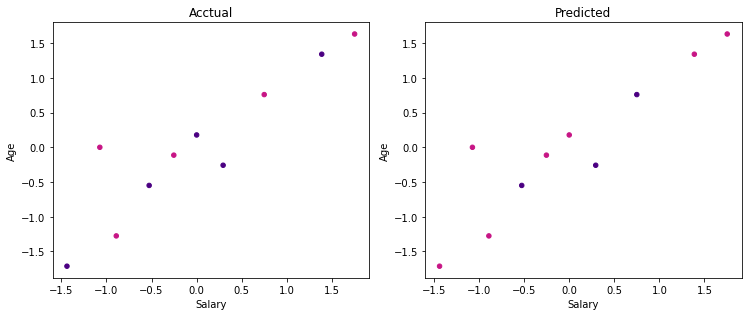

In [399]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_final.plot.scatter("Salary","Age",title="Acctual",ax=axis[0],c=df_final['Purchased'].map(colors))
df_final.plot.scatter("Salary","Age",title="Predicted",ax=axis[1],c=df_final['Y_pred'].map(colors))